# Multivariate Root Finding

## Table of Contents

1. [Fixed-point iteration](#first-bullet)
2. [Newton's method](#second-bullet)

## 1. Fixed-point iteration <a class="anchor" id="first-bullet"></a>

We want to rewrite $F(x)=0$ as $x = G(x)$ to obtain:

$$
x_{k+1} = G(x_k)
$$

We want $G$ to be a contraction, and satisfies if $||G(x) - G(y)|| \leq L||x-y||$, then $||x_k - \alpha||\leq L^k ||x_0 - \alpha||$. So $G$ will converge to a fixed point $\alpha$.

For multivariate case, we have to use **Jacobian matrix** $J_G \in \mathbb{R}^{n \times n}$, which is 

$$
(J_G)_{ij} = {\partial G_i \over \partial x_j}, \quad i,j = 1, ..., n
$$

If $||J_G(\alpha) < 1||$, then there is some neighborhood of $\alpha$ for which the fixed-point iteration converges to $\alpha$.

---

The following program implements fixed-point iteration to solve a system of nonlinear equations:

$$
\begin{align}
x_1^2 + x_2^2 - 1 & = 0\\
5x_1^2 + 21 x_2^2 - 9 &= 0 
\end{align}
$$

It can be rearrange to $x_1 = \sqrt{1-x_2^2} , x_2 = \sqrt{(9-5x_1^2)/21}$. So we define 

$$
G_1(x_1, x_2) = \sqrt{1-x_2^2} ,\quad G_2(x_1, x_2) = \sqrt{(9-5x_1^2)/21}
$$

In [1]:
from math import sqrt

# Define f(x_1, x_2)
def f(x1,x2):
    return (x1*x1+x2*x2-1,5*x1*x1+21*x2*x2-9)

# Store results
ks = []
x1s = []
x2s = []
f1s = []
f2s = []

# Print out solution
def print_sol(k,x1,x2):
    (f1,f2)=f(x1,x2)
    ks.append(k)
    x1s.append(x1)
    x2s.append(x2)
    f1s.append(f1)
    f2s.append(f2)
    print("%4d %18.12g %18.12g %19.12g %19.12g" \
          %(k,x1,x2,f1,f2))

# Define starting position
(x1,x2)=(0.,0.)
print_sol(0,x1,x2)

# Perform fixed-point iteration
for k in range(1,10):
    (x1,x2)=(sqrt(1-x2*x2),sqrt((9.-5.*x1*x1)/21.))
    print_sol(k,x1,x2)


   0                  0                  0                  -1                  -9
   1                  1     0.654653670708      0.428571428571                   5
   2     0.755928946018     0.436435780472     -0.238095238095      -2.14285714286
   3     0.899735410842     0.540848413886      0.102040816327       1.19047619048
   4     0.841120082507     0.485620906056    -0.0566893424036     -0.510204081633
   5     0.874169511937     0.510022643476     0.0242954324587      0.283446712018
   6     0.860160975133      0.49661417054    -0.0134974624771     -0.121477162293
   7     0.867971408296     0.502404479634    0.00578462677588     0.0674873123853
   8     0.864632719045     0.499195933091   -0.00321368154216    -0.0289231338794
   9     0.866489134603     0.500573542753     0.0013772920895     0.0160684077108


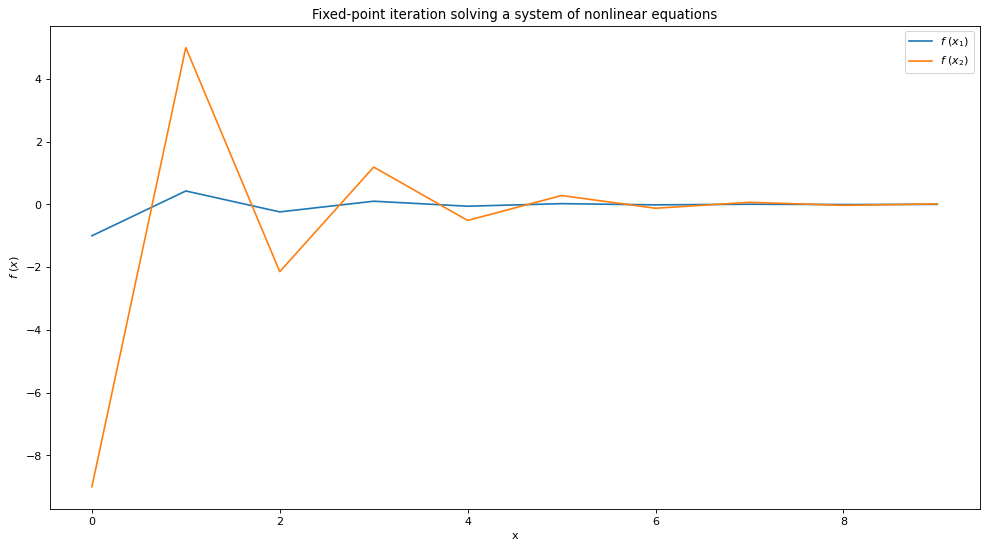

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 8), dpi=80)
plt.plot(ks,f1s, label = r"$f\ (x_1)$")
plt.plot(ks,f2s, label = r"$f\ (x_2)$")
plt.ylabel(r"$f\ (x)$")
plt.xlabel('x')
plt.title('Fixed-point iteration solving a system of nonlinear equations')
plt.legend()
plt.show()

---

## 2. Newton's method  <a class="anchor" id="first-bullet"></a>

The generalization of Newton's method is

$$
x_{k+1} = x_k - J_F(x_k)^{-1} F(x_k), \quad k = 0,1,2, ...
$$

Rewrite it to the standard form for a linear system:

$$
J_F(x_j) \Delta x_k = - F(x_k), \quad k = 0,1,2,...
$$

where $\Delta x_k = x_{k+1}- x_k$.


---

If $x_0$ is sufficiently close to $\alpha$, then Newton's method converges quadratically in $n$ dimension. This relies on **Taylor's Theorem**.

The **multivariate Taylor theorem** is: 

Let $\phi(s) = F(x+ s \delta)$, then 1D Taylor Theorem yields

$$
\phi(1) = \phi(0) + \sum^k_{l=1} {\phi^{(l)} (0) \over l!} + \phi^{(k+1)}(\eta), \quad \eta \in (0,1)
$$

We have

$$
\begin{align}
\phi(0) &= F(x)\\
\phi(1) &= F(x+\delta)\\
\phi'(s) &= {\partial F(x + s\delta) \over \partial x_1} \delta_1 + {\partial F(x + s\delta) \over \partial x_2} \delta_2 + ... + {\partial F(x + s\delta) \over \partial x_n} \delta_n\\
\phi''(s) &= {\partial^2 F(x + s\delta) \over \partial x_1^2} \delta_1^2 + ... + {\partial^2 F(x + s\delta) \over \partial x_1x_n} \delta_1 \delta_n + ... + {\partial^2 F(x + s\delta) \over \partial x_1x_n} \delta_1\delta_n + ... + {\partial^2 F(x + s\delta) \over \partial x_n^2}\delta_n^2\\
\end{align}
$$

where $x$ is a vector, $s$ is a scalar (telling how far along the vector $\delta$), and $\delta$ is a vector (considered as a direction).


Hence, we have

$$
F(x + \delta) = F(x) + \sum^k_{l=1} {U_l(\delta)\over l!} + E_k
$$

where $U_l(x)$ is a direction derivative operator, evaluated at $x$.

$$
U_l(x) = \left[\left({\partial \over \partial x_1} \delta_1 + ... + {\partial \over \partial x_n} \delta_n\right)^l F\right]_{(x)}, \quad l = 1,2,...,k,
$$

and the error, evaluated at $(x+ \eta \delta)$.

$$
E_l = (U_{k+1})_{(x+ \eta \delta)}, \quad \eta \in (0,1)
$$

Let $A$ be an upper bound on the absolute value of all derivative of order $k+1$, we can derive the upper bound of $|E_k|$:

$$
\begin{align}
|E_k| &\leq {1\over (k+1)!} |(A, ..., A)^T(||\delta||^{k+1}_\infty, ..., ||\delta||^{k+1}_\infty)|\\
&= {1\over (k+1)!} A ||\delta||^{k+1}_\infty |(1,...,1)^T (1,...,1)|\\
&= {n^{k+1} \over (k+1)!} A ||\delta||_\infty^{k+1}
\end{align}
$$


---

To analyse Newton's method, we only need to use the first order Taylor expansion:

$$
F(x+\delta) = F(x) + \nabla F(x)^T \delta + E_1
$$

For each $F_i$, we have

$$
F_i(x+\delta) = F_i(x) + \nabla F_i(x)^T \delta + E_{i,1}
$$

So for $F$ we have

$$
F(x+\delta) = F(x) + J_F(x) \delta + E_F
$$

where $||E_F||_\infty \leq \max_{1 \leq i \leq n}|E_{i,1}| \leq {1\over 2} n^2 \left(\max_{1 \leq i, j, l \leq n} |{\partial^2 F_i \over \partial x_j \partial x_l}|\right) ||\delta||^2_{\infty}$.


Let's Taylor expand $F(\alpha)$ at $F(x_k)$,

$$
0 = F(\alpha) = F(x_k) + J_F(x_k)[\alpha - x_k] + E_F
$$

So that

$$
x_k - \alpha = [J_F(x_k)]^{-1} F(x_k) + [J_F(x_k)]^{-1} E_F
$$

Also the Newton iteration can be rewritten as

$$
J_F(x_k)[x_{k+1} - \alpha] = J_F(x_k) [x_k - \alpha] - F(x_k)
$$

Combine these two equations we have

$$
x_{k+1} - \alpha = [J_F(x_k)]^{-1} E_F
$$

so that $||x_{k+1} - \alpha||_{\infty} \leq const. ||x_k - \alpha||^2_\infty$, i.e. **quadratic convergence**.

---

The following program implements a Newton's method for the two-point Gaussian quadrature rule.

$$
\begin{align}
F_1(x_1, x_2, w_1, w_2) &= w_1 + w_2 -2 = 0\\
F_2(x_1, x_2, w_1, w_2) &= w_1x_1 + w_2x_2 = 0\\
F_3(x_1, x_2, w_1, w_2) &= w_1x_1^2 + w_2 x_2^2 - 2/3 = 0\\
F_4(x_1, x_2, w_1, w_2) &= w_1x_1^3 + w_2x_2^3 = 0
\end{align}
$$

The Jacobian of the system is required

$$
J_F(x_1, x_2, w_1, w_2) = \begin{bmatrix}0 & 0& 1 & 1 \\ w_1 & w_2 & x_1 & x_2 \\ 2w_1x_1 & 2w_2x_2 & x_1^2 & x_2^2\\ 3w_1x_1^2 & 3w_2x_2^2 & x_1^3 & x_2^3 \end{bmatrix}
$$

In [3]:
import numpy as np
from scipy.optimize import fsolve

# Function f(x_1,x_2,w_1,w_2)
def f(x):
    print(x)
    (x1,x2,w1,w2)=(x[0],x[1],x[2],x[3])
    x1s=x1*x1;x2s=x2*x2
    f=np.array([w1+w2-2,
                w1*x1+w2*x2, 
                w1*x1s+w2*x2s-2./3,
                w1*x1s*x1+w2*x2s*x2])
    return f

# Analytical Jacobian
def jacobian(x):
    (x1,x2,w1,w2)=(x[0],x[1],x[2],x[3])
    x1s=x1*x1;x2s=x2*x2
    return np.array([[0,0,1,1],
                     [w1,w2,x1,x2],
                     [2*w1*x1,2*w2*x2,x1s,x2s],
                     [3*w1*x1s,3*w2*x2s,x1s*x1,x2s*x2]])

# Initial condition
x0=np.array([-1.,1.,1.,1.])

# Newton's method
if True:
    xk=x0
    fk=f(xk)
    err=np.linalg.norm(fk)
    while err>1e-16:
        xk-=np.linalg.solve(jacobian(xk),fk)
        fk=f(xk)
        err=np.linalg.norm(fk)

# Print solution
print("\nSolution is",xk)

[-1.  1.  1.  1.]
[-0.66666667  0.66666667  1.          1.        ]
[-0.58333333  0.58333333  1.          1.        ]
[-0.57738095  0.57738095  1.          1.        ]
[-0.57735027  0.57735027  1.          1.        ]
[-0.57735027  0.57735027  1.          1.        ]

Solution is [-0.57735027  0.57735027  1.          1.        ]
